# WEATHER PREDICTION

### IMPORTING REQUIRED PACKAGES

In [1]:
import pmdarima as pm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### LOADING DATA FROM DATA SOURCE

In [ ]:


# Generate a hypothetical time series dataset


# Create a pandas DataFrame
df = pd.DataFrame(data={'date': date_rng, 'sales': sales_data})

# Set the date column as the index
df = df.set_index('date')

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Fit an ARIMA model using pmdarima
model = pm.auto_arima(train, suppress_warnings=True, seasonal=True, m=12)
print(model.summary())

# Forecast future values
forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)
forecast_index = pd.date_range(start=test.index[0], periods=len(test), freq='M')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='red', alpha=0.2, label='95% Confidence Interval')
plt.title('ARIMA Forecasting with pmdarima')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')


In [4]:
Weather_data = pd.read_csv('pune.csv')
Weather_data

,date_time,maxtempC,mintempC,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2017-01-01 01:00:00,31.0,17.0,11.0,6.0,20.0,09:15 AM,08:58 PM,07:07 AM,06:09 PM,...,18.0,5.0,1,63,0.0,1014.0,18,10,82,2
1,2017-01-01 02:00:00,31.0,17.0,11.0,6.0,20.0,09:15 AM,08:58 PM,07:07 AM,06:09 PM,...,18.0,5.0,0,63,0.0,1014.0,18,10,94,3
2,2017-01-01 03:00:00,31.0,17.0,11.0,6.0,20.0,09:15 AM,08:58 PM,07:07 AM,06:09 PM,...,17.0,6.0,0,64,0.0,1014.0,17,10,105,3
3,2017-01-01 04:00:00,31.0,17.0,11.0,6.0,20.0,09:15 AM,08:58 PM,07:07 AM,06:09 PM,...,19.0,7.0,1,57,0.0,1014.0,19,10,110,4
4,2017-01-01 05:00:00,31.0,17.0,NaN,6.0,20.0,09:15 AM,08:58 PM,07:07 AM,06:09 PM,...,19.0,8.0,1,51,0.0,1015.0,19,10,115,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45498,2022-03-11 19:00:00,35.0,23.0,11.8,7.0,56.0,12:40 PM,01:33 AM,06:46 AM,06:43 PM,...,30.0,10.0,6,28,0.0,1009.0,30,10,235,7
45499,2022-03-11 20:00:00,35.0,23.0,11.8,7.0,56.0,12:40 PM,01:33 AM,06:46 AM,06:43 PM,...,29.0,14.0,7,29,0.0,1010.0,29,10,289,9
45500,2022-03-11 21:00:00,35.0,23.0,11.8,7.0,56.0,12:40 PM,01:33 AM,06:46 AM,06:43 PM,...,27.0,12.0,9,30,0.0,1012.0,27,10,343,12
45501,2022-03-11 22:00:00,35.0,23.0,11.8,7.0,56.0,12:40 PM,01:33 AM,06:46 AM,06:43 PM,...,26.0,14.0,8,31,0.0,1011.0,26,10,234,11


In [7]:
Weather_data.set_index(pd.to_datetime(Weather_data['date_time']))

,date_time,maxtempC,mintempC,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 01:00:00,2017-01-01 01:00:00,31.0,17.0,11.0,6.0,20.0,09:15 AM,08:58 PM,07:07 AM,06:09 PM,...,18.0,5.0,1,63,0.0,1014.0,18,10,82,2
2017-01-01 02:00:00,2017-01-01 02:00:00,31.0,17.0,11.0,6.0,20.0,09:15 AM,08:58 PM,07:07 AM,06:09 PM,...,18.0,5.0,0,63,0.0,1014.0,18,10,94,3
2017-01-01 03:00:00,2017-01-01 03:00:00,31.0,17.0,11.0,6.0,20.0,09:15 AM,08:58 PM,07:07 AM,06:09 PM,...,17.0,6.0,0,64,0.0,1014.0,17,10,105,3
2017-01-01 04:00:00,2017-01-01 04:00:00,31.0,17.0,11.0,6.0,20.0,09:15 AM,08:58 PM,07:07 AM,06:09 PM,...,19.0,7.0,1,57,0.0,1014.0,19,10,110,4
2017-01-01 05:00:00,2017-01-01 05:00:00,31.0,17.0,NaN,6.0,20.0,09:15 AM,08:58 PM,07:07 AM,06:09 PM,...,19.0,8.0,1,51,0.0,1015.0,19,10,115,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-11 19:00:00,2022-03-11 19:00:00,35.0,23.0,11.8,7.0,56.0,12:40 PM,01:33 AM,06:46 AM,06:43 PM,...,30.0,10.0,6,28,0.0,1009.0,30,10,235,7
2022-03-11 20:00:00,2022-03-11 20:00:00,35.0,23.0,11.8,7.0,56.0,12:40 PM,01:33 AM,06:46 AM,06:43 PM,...,29.0,14.0,7,29,0.0,1010.0,29,10,289,9
2022-03-11 21:00:00,2022-03-11 21:00:00,35.0,23.0,11.8,7.0,56.0,12:40 PM,01:33 AM,06:46 AM,06:43 PM,...,27.0,12.0,9,30,0.0,1012.0,27,10,343,12


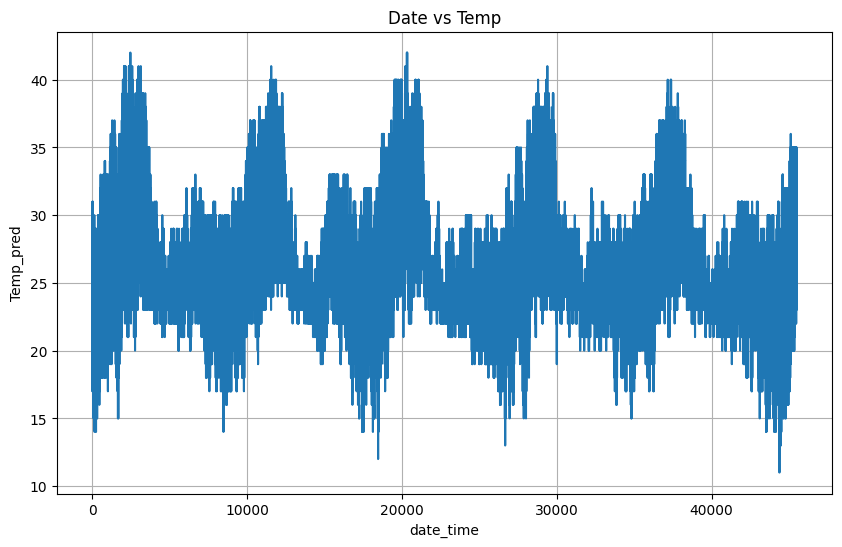

In [8]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('date_time')
plt.ylabel('Temp_pred')
plt.plot(Weather_data['tempC'])
plt.title('Date vs Temp')
plt.show()

<Axes: ylabel='Density'>

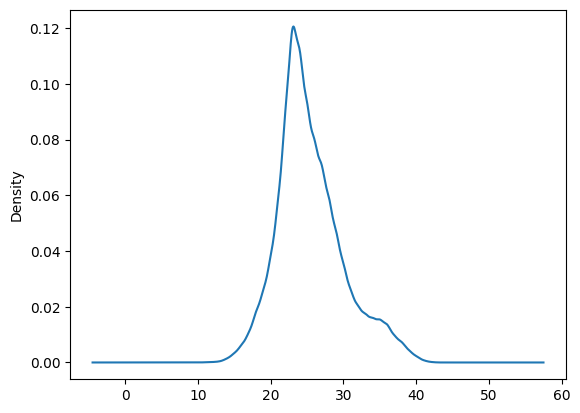

In [10]:
#Distribution of the dataset
df_temp = Weather_data['tempC']
df_temp.plot(kind='kde')

## EXPLORATORY DATA ANALYSIS (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45503 entries, 0 to 45502
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          45501 non-null  object 
 1   maxtempC           44633 non-null  float64
 2   mintempC           45478 non-null  float64
 3   sunHour            45351 non-null  float64
 4   uvIndex            45450 non-null  float64
 5   moon_illumination  45502 non-null  float64
 6   moonrise           45503 non-null  object 
 7   moonset            45503 non-null  object 
 8   sunrise            45503 non-null  object 
 9   sunset             45503 non-null  object 
 10  DewPointC          45500 non-null  float64
 11  FeelsLikeC         45503 non-null  int64  
 12  HeatIndexC         45503 non-null  int64  
 13  WindChillC         45478 non-null  float64
 14  WindGustKmph       45494 non-null  float64
 15  cloudcover         45503 non-null  int64  
 16  humidity           455

In [4]:
df.describe()

,maxtempC,mintempC,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,44633.000000,45478.000000,45351.000000,45450.000000,45502.000000,45500.000000,45503.000000,45503.000000,45478.000000,45494.000000,45503.000000,45503.000000,45487.000000,45501.000000,45503.000000,45503.000000,45503.000000,45503.000000
mean,30.831201,21.249307,11.087453,6.266249,46.087557,43464.701736,26.322221,26.491462,25.437706,18.101552,31.633013,56.551348,0.246156,1009.847981,25.438543,9.629739,208.436389,10.298332
std,4.242974,2.667357,1.002336,0.924189,31.231273,13136.110646,4.384641,4.242005,4.562040,8.647081,33.945653,24.535400,0.883922,3.594591,4.562331,1.131830,87.580946,5.138205
min,22.000000,11.000000,8.300000,4.000000,0.000000,20714.000000,10.000000,11.000000,10.000000,1.000000,0.000000,4.000000,0.000000,997.000000,11.000000,2.000000,0.000000,0.000000
25%,28.000000,20.000000,10.500000,6.000000,19.000000,32088.750000,25.000000,25.000000,23.000000,12.000000,2.000000,36.000000,0.000000,1007.000000,23.000000,10.000000,113.000000,6.000000
50%,30.000000,22.000000,11.000000,6.000000,46.000000,43463.500000,26.000000,26.000000,25.000000,16.000000,13.000000,57.000000,0.000000,1010.000000,25.000000,10.000000,253.000000,9.000000
75%,34.000000,23.000000,11.800000,7.000000,73.000000,54841.250000,29.000000,29.000000,28.000000,23.000000,66.000000,80.000000,0.100000,1013.000000,28.000000,10.000000,273.000000,14.000000
max,42.000000,28.000000,13.500000,8.000000,100.000000,66216.000000,44.000000,44.000000,42.000000,76.000000,100.000000,98.000000,25.700000,1020.000000,42.000000,10.000000,360.000000,40.000000


## DATA PREPROCESSING

### Deleting Unnecessary Attributes

In [5]:
df.drop(['date_time', 'moonrise', 'moonset', 'sunrise', 'sunset'], axis = 1, inplace = True)

### Finding The Missing Data (NaN Values)

In [6]:
df.isna().sum()

maxtempC             870
mintempC              25
sunHour              152
uvIndex               53
moon_illumination      1
DewPointC              3
FeelsLikeC             0
HeatIndexC             0
WindChillC            25
WindGustKmph           9
cloudcover             0
humidity               0
precipMM              16
pressure               2
tempC                  0
visibility             0
winddirDegree          0
windspeedKmph          0
dtype: int64

### Filling The Missing Data

In [7]:
df.mean()

maxtempC                30.831201
mintempC                21.249307
sunHour                 11.087453
uvIndex                  6.266249
moon_illumination       46.087557
DewPointC            43464.701736
FeelsLikeC              26.322221
HeatIndexC              26.491462
WindChillC              25.437706
WindGustKmph            18.101552
cloudcover              31.633013
humidity                56.551348
precipMM                 0.246156
pressure              1009.847981
tempC                   25.438543
visibility               9.629739
winddirDegree          208.436389
windspeedKmph           10.298332
dtype: float64

In [8]:
filled_df = df.fillna(df.mean())

In [9]:
df.corr()

,maxtempC,mintempC,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
maxtempC,1.000000,0.432934,0.732849,0.877296,0.004230,-0.191897,0.476661,0.472316,0.563047,-0.226838,-0.616279,-0.650800,-0.285268,0.135775,0.563063,0.253806,0.115373,-0.201716
mintempC,0.432934,1.000000,0.255677,0.409814,-0.038063,-0.108766,0.609907,0.613968,0.484643,0.232017,0.240140,0.112778,0.096242,-0.571164,0.484693,-0.112654,0.377304,0.266197
sunHour,0.732849,0.255677,1.000000,0.713600,0.036066,-0.162718,0.333917,0.323808,0.396046,-0.168338,-0.614826,-0.522832,-0.286764,0.154593,0.395922,0.271488,0.064913,-0.118945
uvIndex,0.877296,0.409814,0.713600,1.000000,0.008196,-0.146355,0.439284,0.434815,0.510854,-0.257899,-0.598379,-0.590915,-0.277930,0.157560,0.510844,0.234745,0.039041,-0.225605
moon_illumination,0.004230,-0.038063,0.036066,0.008196,1.000000,-0.008398,-0.011597,-0.013183,-0.010278,-0.017096,-0.039312,-0.011973,-0.042887,0.030760,-0.010730,0.033868,-0.016528,-0.008115
DewPointC,-0.191897,-0.108766,-0.162718,-0.146355,-0.008398,1.000000,-0.092167,-0.087755,-0.091459,-0.032222,0.107167,0.089648,-0.000224,-0.037625,-0.091376,0.025850,-0.032780,-0.019788
FeelsLikeC,0.476661,0.609907,0.333917,0.439284,-0.011597,-0.092167,1.000000,0.989465,0.948488,0.309613,0.008526,-0.349516,0.012158,-0.396134,0.948453,0.010455,0.176468,0.318855
HeatIndexC,0.472316,0.613968,0.323808,0.434815,-0.013183,-0.087755,0.989465,1.000000,0.945679,0.304109,0.014495,-0.338605,0.012118,-0.398906,0.945683,0.003516,0.176275,0.312744
WindChillC,0.563047,0.484643,0.396046,0.510854,-0.010278,-0.091459,0.948488,0.945679,1.000000,0.231008,-0.169881,-0.550726,-0.062203,-0.238449,0.999977,0.086912,0.087102,0.229358
WindGustKmph,-0.226838,0.232017,-0.168338,-0.257899,-0.017096,-0.032222,0.309613,0.304109,0.231008,1.000000,0.468400,0.214457,0.319227,-0.531782,0.231211,-0.144319,0.245852,0.917917


<Axes: >

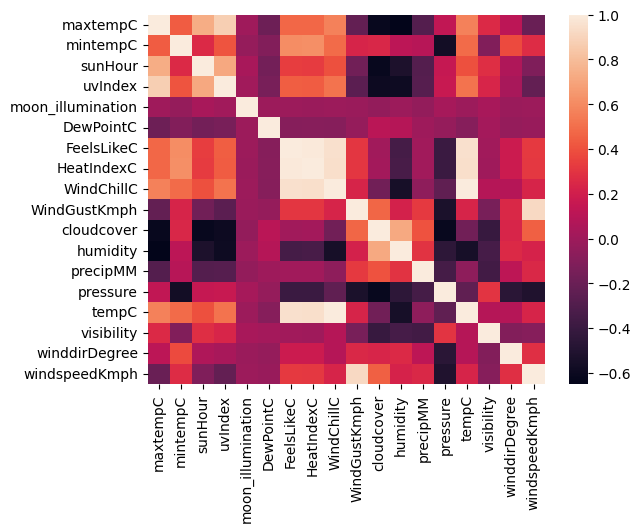

In [10]:
sns.heatmap(df.corr())

In [11]:
filled_df.isna().sum()

maxtempC             0
mintempC             0
sunHour              0
uvIndex              0
moon_illumination    0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
dtype: int64

### Splitting Data into X and Y 

In [12]:
X= filled_df.drop(['tempC','moon_illumination','DewPointC','cloudcover','precipMM','visibility','winddirDegree'],axis=1)
Y= filled_df['tempC']

In [22]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Assuming X and y are your feature matrix and target variable
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=12345)

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# Create Lasso model with regularization strength (alpha)
lasso_model = Lasso(alpha=1)  # Adjust alpha as needed

# Fit the model
lasso_model.fit(x_train_scaled, y_train)

# Make predictions
y_pred = lasso_model.predict(x_test_scaled)


### Model Building

In [14]:
from xgboost import XGBRegressor
model= XGBRegressor()
model.fit(y_test,y_pred)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [15]:
mae=mean_absolute_error(y_test,y_pred)
mae

0.76853878260082

In [16]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

0.9964631424028356

In [17]:
from sklearn.metrics import r2_score
R2=r2_score(y_test,y_pred)
R2


0.9517564864445727

In [18]:
df.columns

Index(['maxtempC', 'mintempC', 'sunHour', 'uvIndex', 'moon_illumination',
       'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph',
       'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 'visibility',
       'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [19]:
temp = model.predict([15])
print(temp)

[17.246492]
